<h1>Project 2 (Week 2)</h1>

<h1> Exploratory Data Analysis/Cost Analysis on Health Insurance Dataset </h1>

**Importing Essential Libraries**

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly as pio
import matplotlib.colors as mcolors

In [8]:
import warnings
warnings.filterwarnings('ignore')

**Importing the Dataset**

In [9]:
df=pd.read_csv('C:/Users/gmehu/OneDrive/Desktop/Economics/Meradoc/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_dummy
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


In [53]:
df.tail()

,age,bmi,children,region,charges,smoker_dummy,age_group,female,smoker_yes
1333,50,30.97,3,northwest,10600.5483,0,51-60,0,0
1334,18,31.92,0,northeast,2205.9808,0,18-30,0,0
1335,18,36.85,0,southeast,1629.8335,0,18-30,0,0
1336,21,25.80,0,southwest,2007.9450,0,18-30,0,0
1337,61,29.07,0,northwest,29141.3603,1,61-70,0,0


**Print the DataTypes in the given dataset**

In [20]:
print(f'DataTypes in given dataset: \n{df.dtypes}')

DataTypes in given dataset: 
age               int64
sex              object
bmi             float64
children          int64
smoker           object
region           object
charges         float64
smoker.1         object
smoker_dummy      int64
dtype: object


**Print the info of the given dataset**

In [21]:
print(f'Information about the given dataset: ')
print("")
print({df.info()})

Information about the given dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1338 non-null   int64  
 1   sex           1338 non-null   object 
 2   bmi           1338 non-null   float64
 3   children      1338 non-null   int64  
 4   smoker        1338 non-null   object 
 5   region        1338 non-null   object 
 6   charges       1338 non-null   float64
 7   smoker.1      1338 non-null   object 
 8   smoker_dummy  1338 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 94.2+ KB
{None}


**Descriptive Statistics**

In [24]:
df.describe()

,age,bmi,children,charges,smoker_dummy
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.204783
std,14.049960,6.098187,1.205493,12110.011237,0.403694
min,18.000000,15.960000,0.000000,1121.873900,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000


**Checking the correlation**

In [45]:
p = ['#B14B51', '#EE6363', '#FF7F7F', '#FFAFAF', '#FFCCCC', '#FFB6B6', '#FFDADA', '#FFECEC', '#FFF4F4']

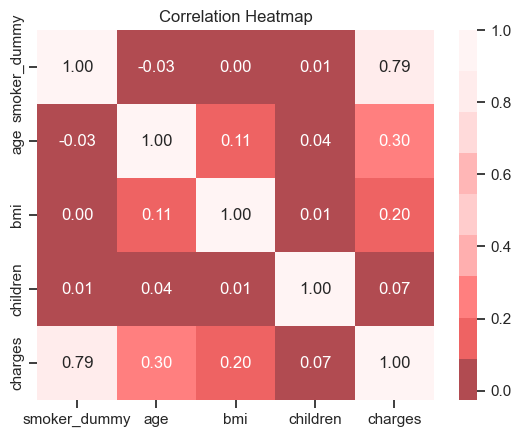

In [44]:
variables = ['smoker_dummy', 'age', 'bmi', 'children', 'charges']
correlation_matrix = df[variables].corr()
cmap = mcolors.ListedColormap(p)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=cmap)
plt.title('Correlation Heatmap')
plt.show()

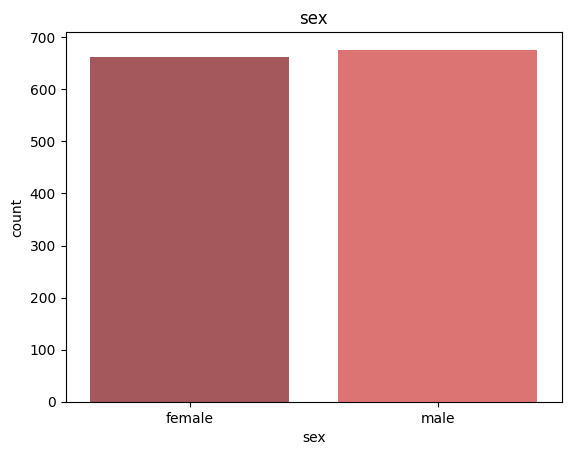

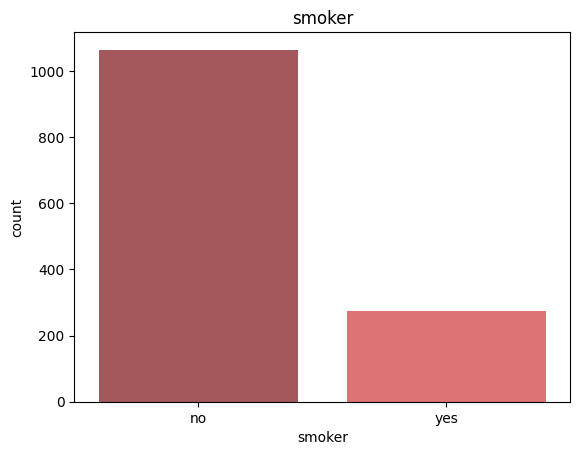

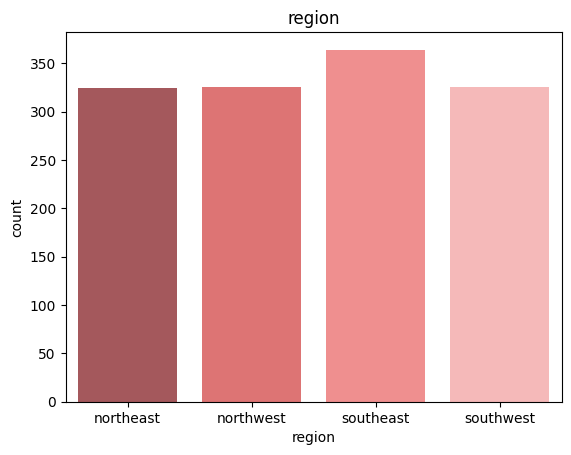

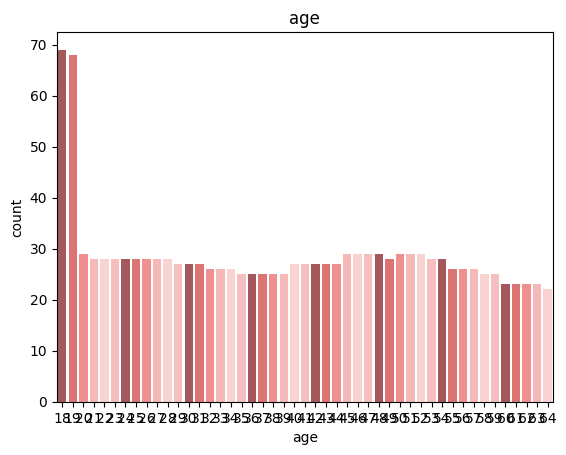

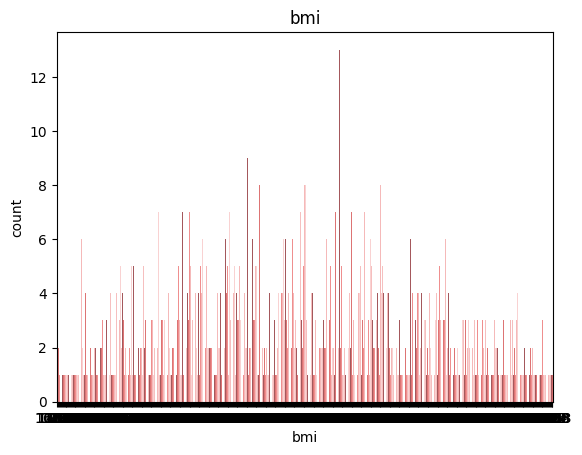

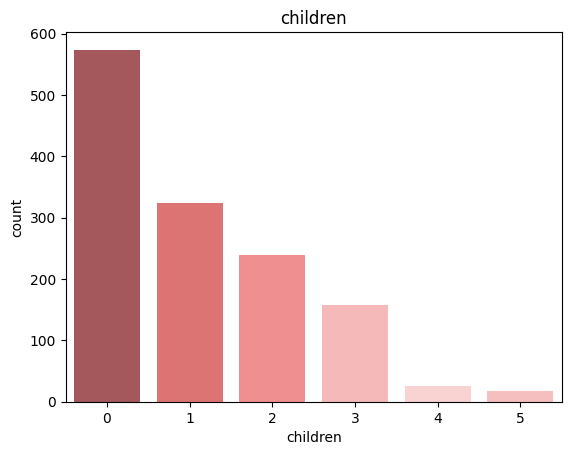

In [19]:
variables = ['sex', 'smoker', 'region', 'age', 'bmi', 'children']

# Iterate over the variables and create bar plots with custom colors
for v in variables:
    # Sort the DataFrame by the variable
    df_sorted = df.sort_values(by=v)
    sns.countplot(data=df_sorted, x=v, palette=p)
    plt.title(v)
    plt.show()

*Above displayed 6 bar graphs show different countplots associated with different variables of the data*

Mean cost analysis:


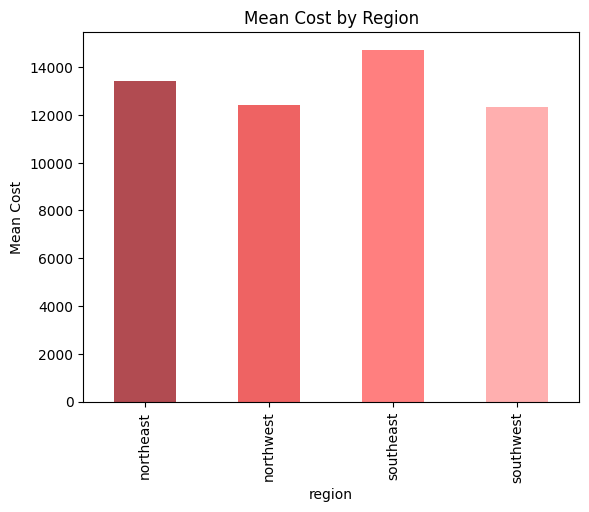

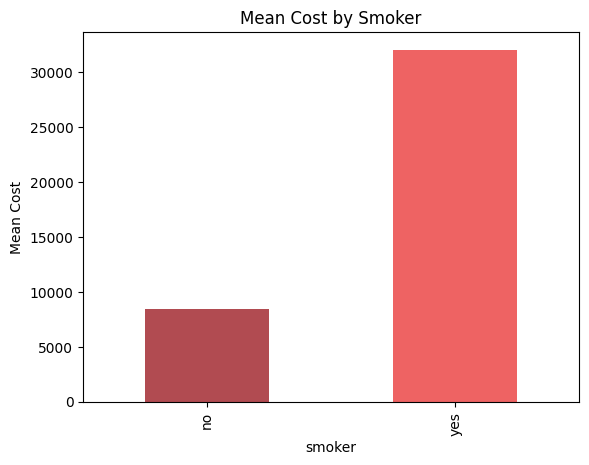

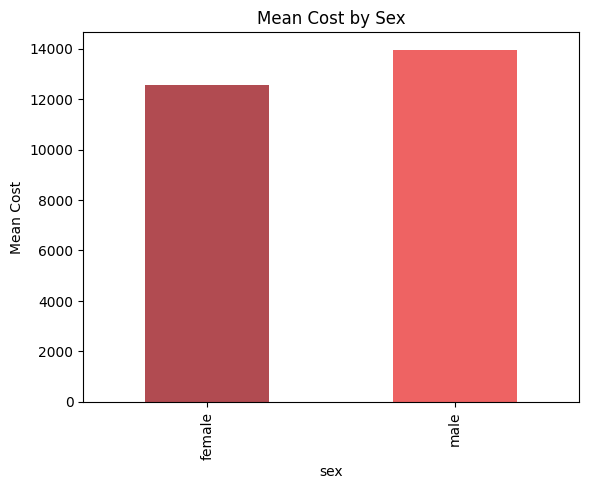

In [20]:
variables = ['region', 'smoker', 'sex']
print('Mean cost analysis:')
for v, color in zip(variables, colors):
    group_df = df.groupby(v)['charges'].mean().sort_index()
    group_df.plot(kind='bar', ylabel='Mean Cost', title=f'Mean Cost by {v.capitalize()}', color=p)
    plt.show()

*Each bar represents the average cost associated with a specific category. Graph provides visual comparison of mean cost among different categories*

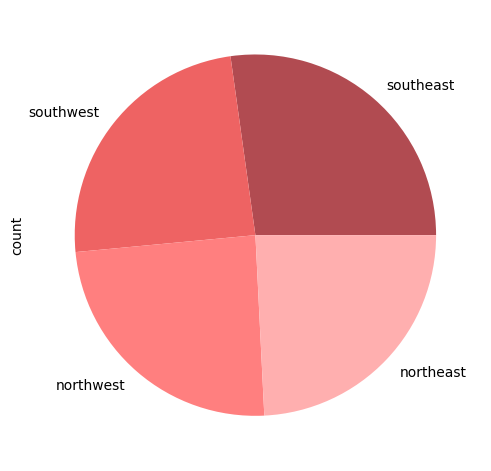

In [21]:
plt.figure(figsize=(5,5))
df['region'].value_counts().plot.pie(colors=p)
plt.tight_layout()
plt.show()

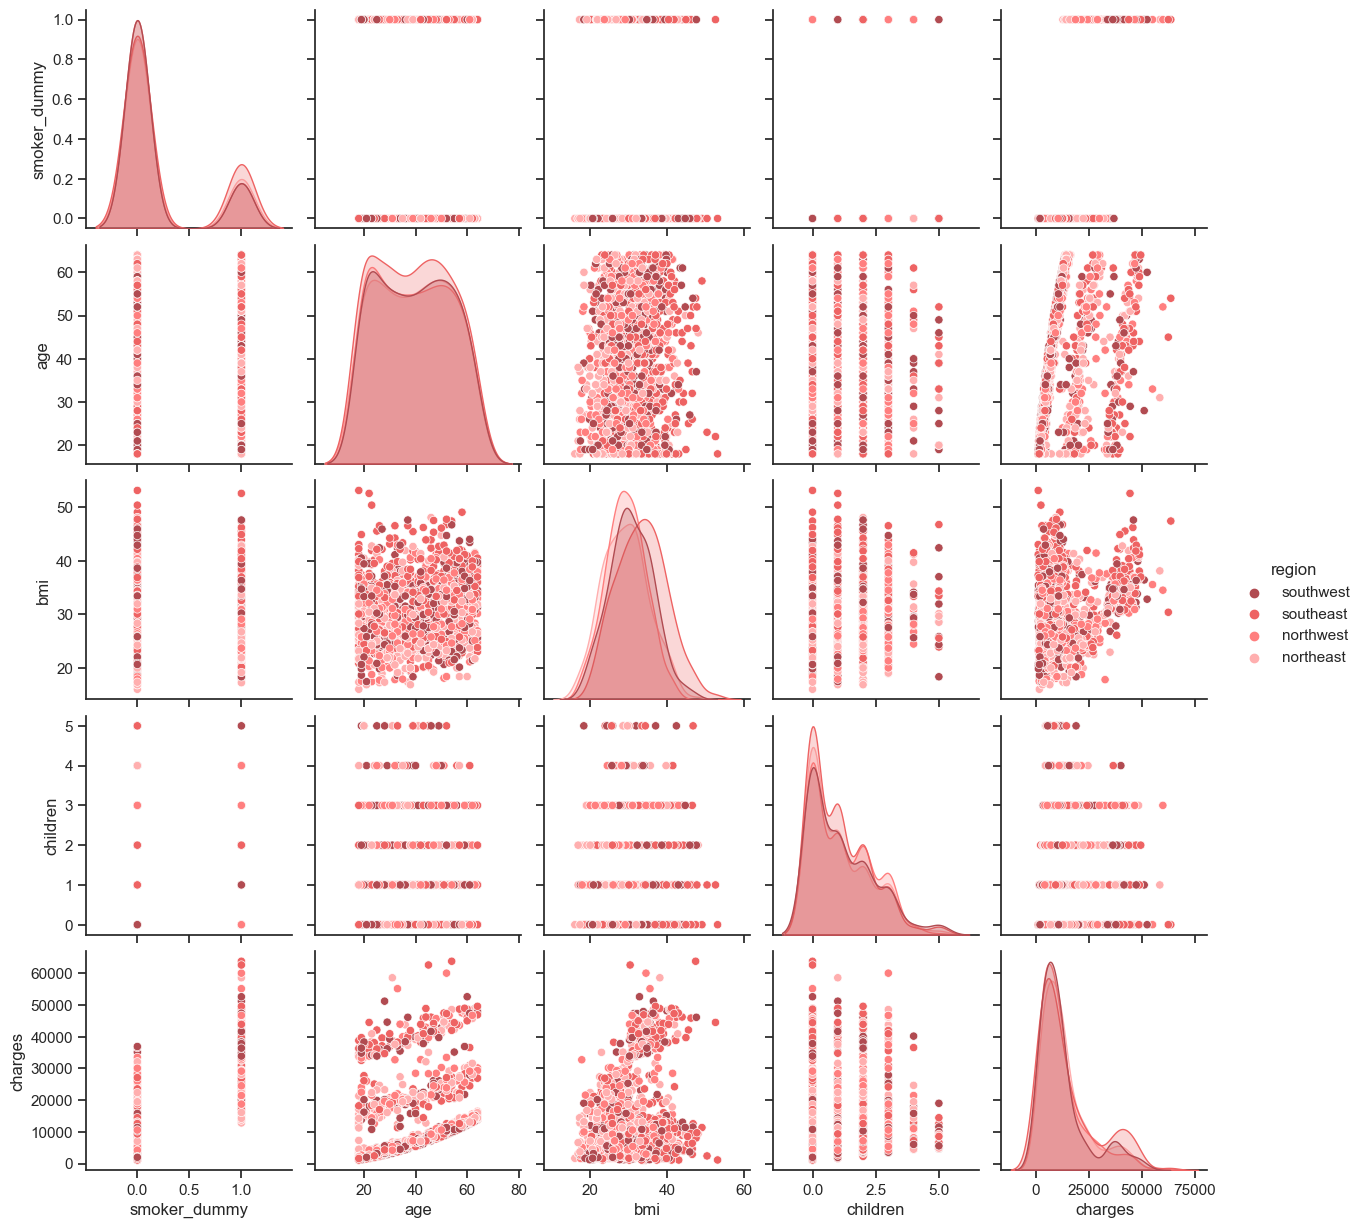

In [22]:
variables = ['sex','smoker_dummy','region','age','bmi','children','charges']
sns.set(style="ticks")
sns_plot = sns.pairplot(df[variables], hue= 'region',palette=p)
plt.show()

*Above graph displays relationships and distributions between multiple variables in the dataset. Color-coded based on region allows visual comparison across different regions* 

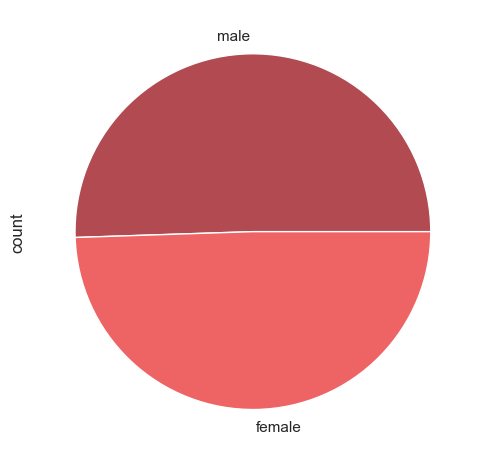

In [23]:
plt.figure(figsize=(5,5))
df['sex'].value_counts().plot.pie(colors=p)
plt.tight_layout()
plt.show()

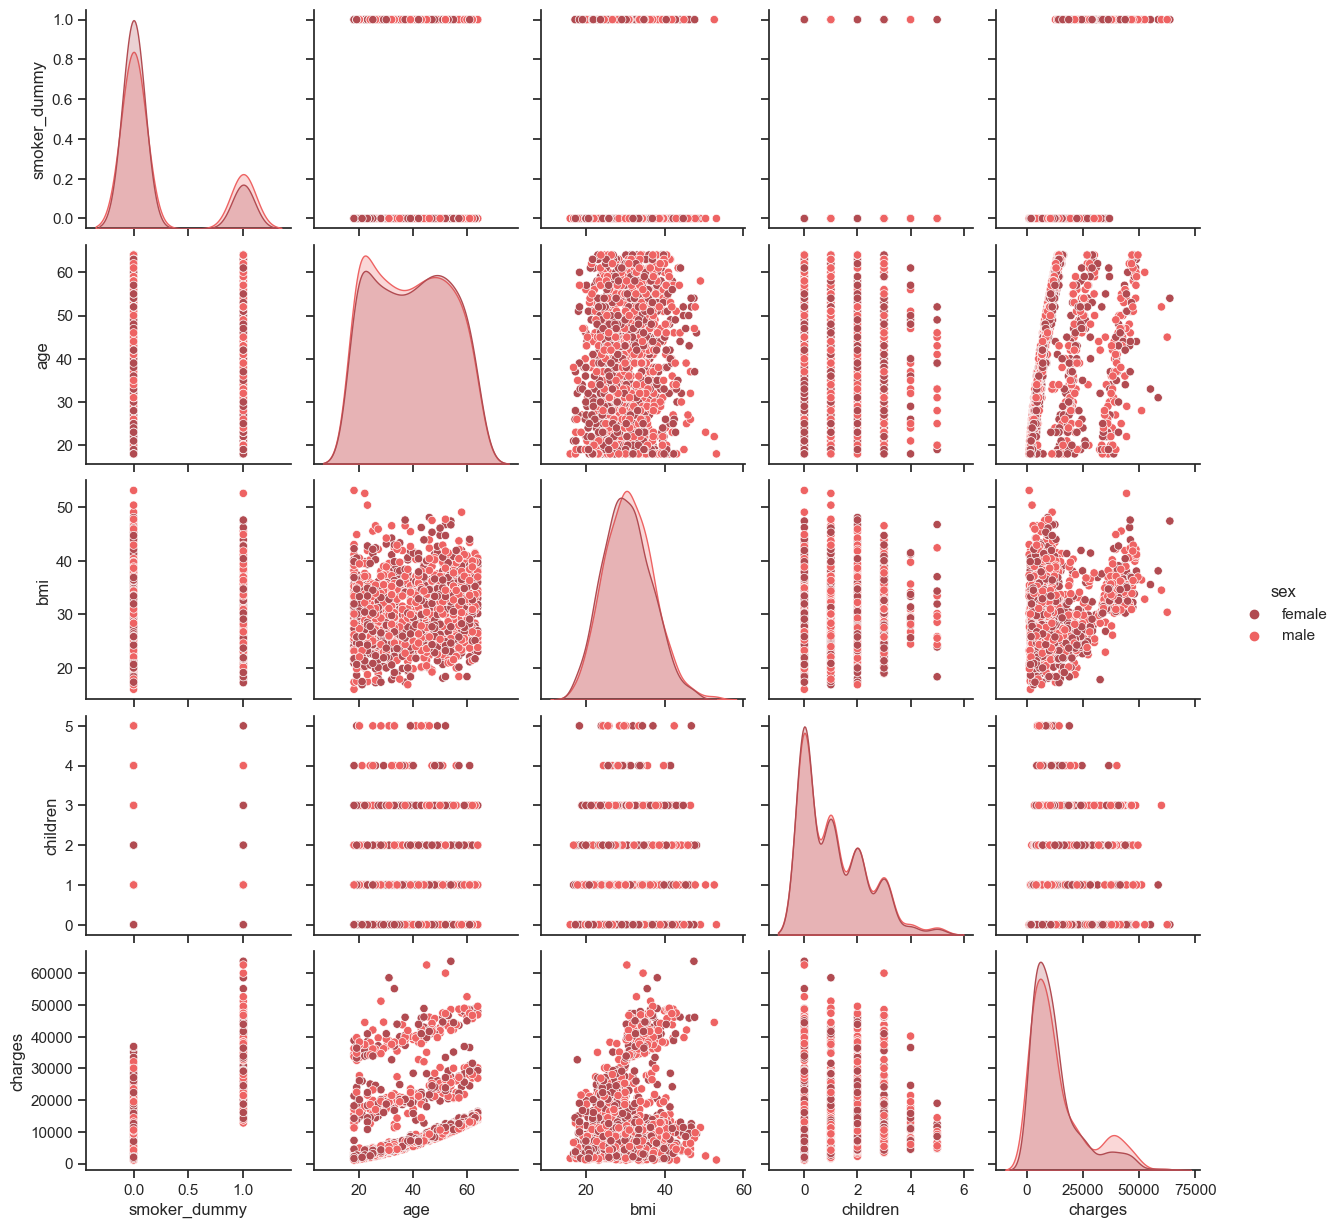

In [24]:
variables = ['sex','smoker_dummy','region','age','bmi','children','charges']
sns.set(style="ticks")
sns_plot = sns.pairplot(df[variables], hue= 'sex',palette=p)
plt.show()

*Color-coded based on sex displays visual comparison based on different sex*

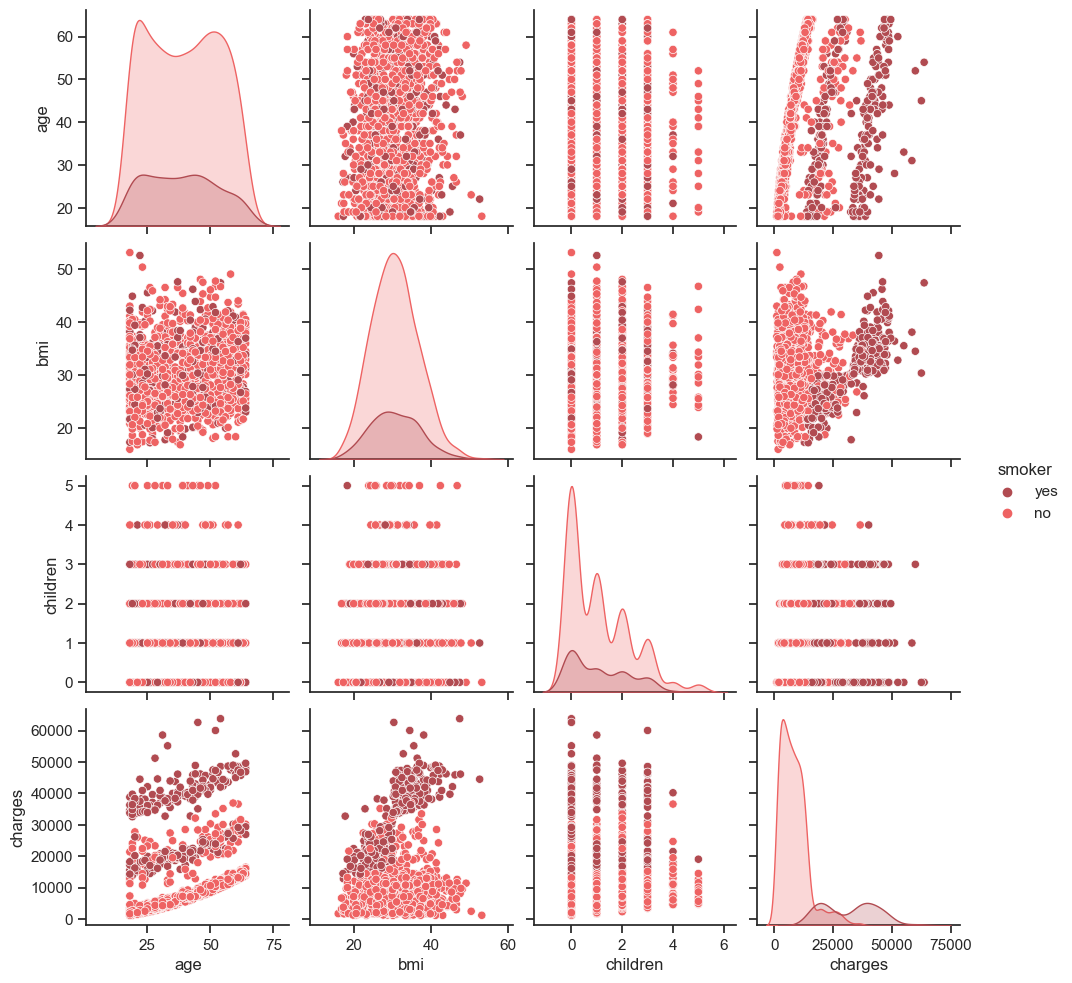

In [25]:
variables = ['age', 'sex', 'bmi', 'children','smoker', 'region', 'charges']
sns.set(style='ticks')
sns_plot = sns.pairplot(df[variables],hue='smoker', palette=p)
plt.show()

*Color-coded based on smoker allows visual comparison based on whether the person is smoker or not*

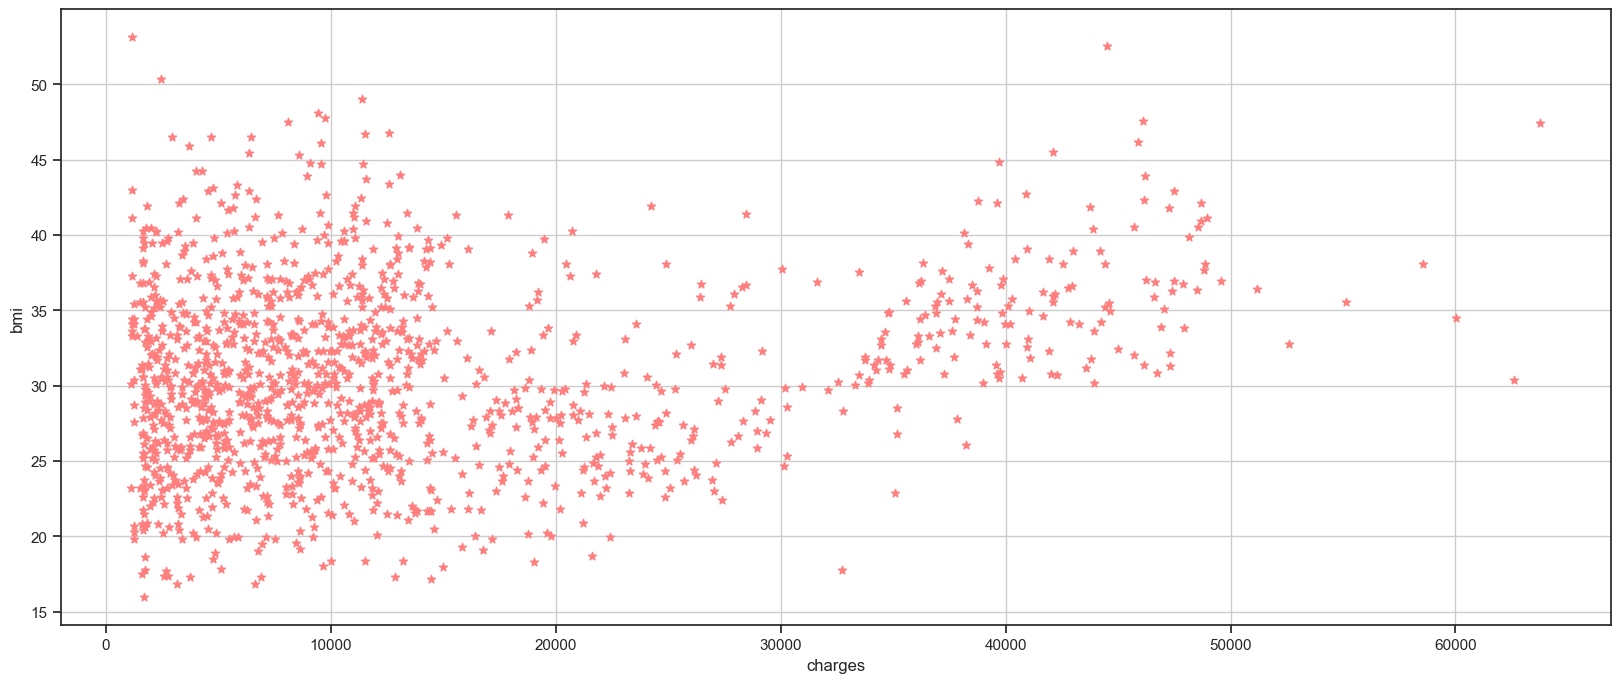

In [46]:
fig,ax=plt.subplots(figsize=(20,8))
ax.scatter(df['charges'],df['bmi'],marker= '*', color = '#FF7F7F')
ax.set_xlabel('charges')
ax.set_ylabel('bmi')
plt.grid()
plt.show()

*The plot helps in understanding relationship between charges and BMI of the people. As we can see most of the people whose BMI ranges between 15-35, their charges ranges between 0-1000*

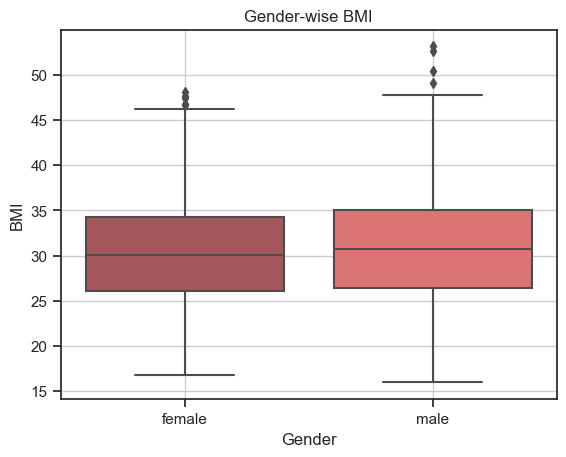

In [26]:
sns.boxplot(x='sex', y='bmi', data=df, palette=p)
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.title('Gender-wise BMI')
plt.grid()
plt.show()

*Displays variation in distribution of BMI values between females and males.*

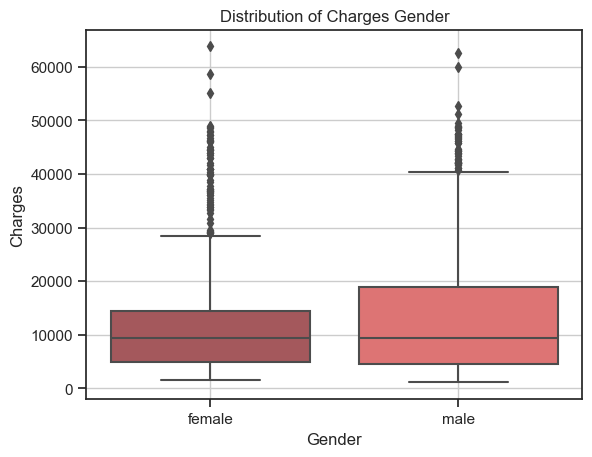

In [27]:
sns.boxplot(x='sex', y='charges', data=df, palette=p)
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.title('Distribution of Charges Gender')
plt.grid()
plt.show()

*It shows us variations in insurance charges between males and females with outliers ranging 30000 onwards for females and 40000 onwards for males.*

**Creating different age groups in the dataset**

In [29]:
bins = [18, 30, 40, 50, 60, 70, 80]
labels = ['18-30', '31-40', '41-50', '51-60', '61-70', '71-80']

# Create a new column 'age_group' in the DataFrame
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

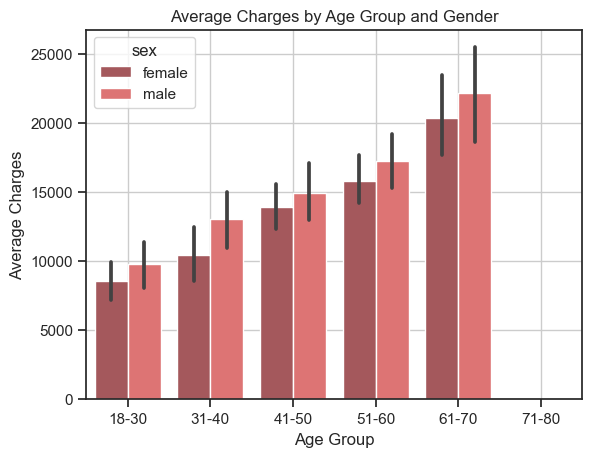

In [30]:
sns.barplot(x='age_group', y='charges', hue='sex', data=df, palette=p)
plt.xlabel('Age Group')
plt.ylabel('Average Charges')
plt.title('Average Charges by Age Group and Gender')
plt.grid()
plt.show()

*It is visible that people in the age-group 61-70 have highest charges*

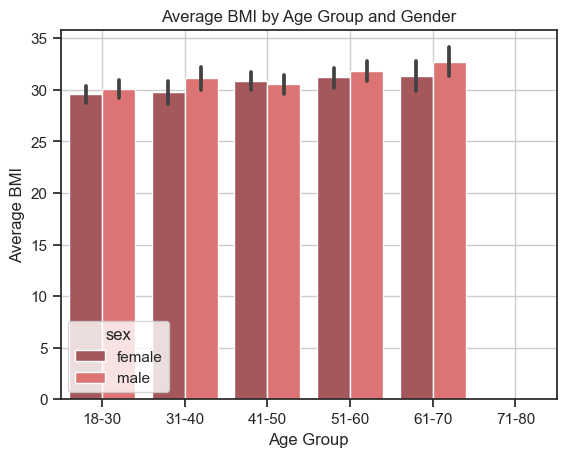

In [31]:
sns.barplot(x='age_group', y='bmi', hue='sex', data=df, palette=p)
plt.xlabel('Age Group')
plt.ylabel('Average BMI')
plt.title('Average BMI by Age Group and Gender')
plt.grid()
plt.show()

*Females in all the age-group have high BMI than males except the age group 41-50 where males have higher BMI*

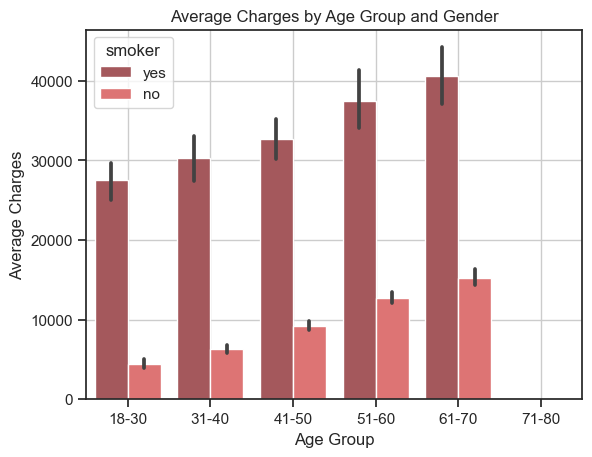

In [32]:
sns.barplot(x='age_group', y='charges', hue='smoker', data=df, palette=p)
plt.xlabel('Age Group')
plt.ylabel('Average Charges')
plt.title('Average Charges by Age Group and Gender')
plt.grid()
plt.show()

*People who smoke have high insurance charges and it is clearly visible in the graph above*

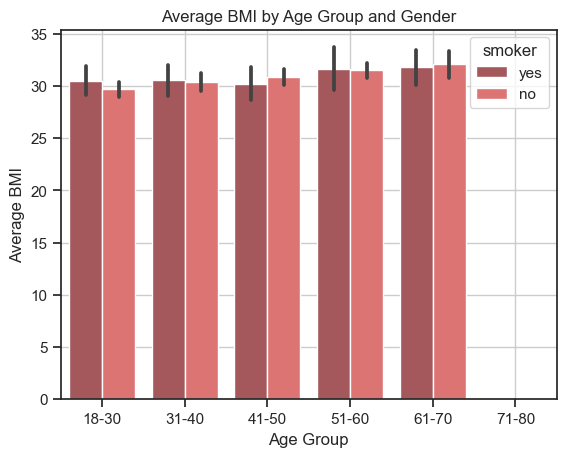

In [33]:
sns.barplot(x='age_group', y='bmi', hue='smoker', data=df, palette=p)
plt.xlabel('Age Group')
plt.ylabel('Average BMI')
plt.title('Average BMI by Age Group and Gender')
plt.grid()
plt.show()

*BMI of non-smokers is slightly higher than smokers*

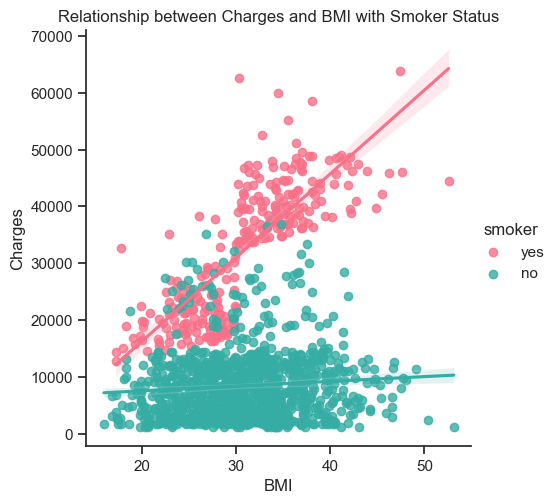

In [35]:
sns.set(style="ticks")
sns.lmplot(x="bmi", y="charges", hue="smoker", data=df, palette='husl')
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("Relationship between Charges and BMI with Smoker Status")

plt.show()

*Linear relationship between BMI and insurance charges in case of smokers while in case of non-smokers relationship is almost constant*

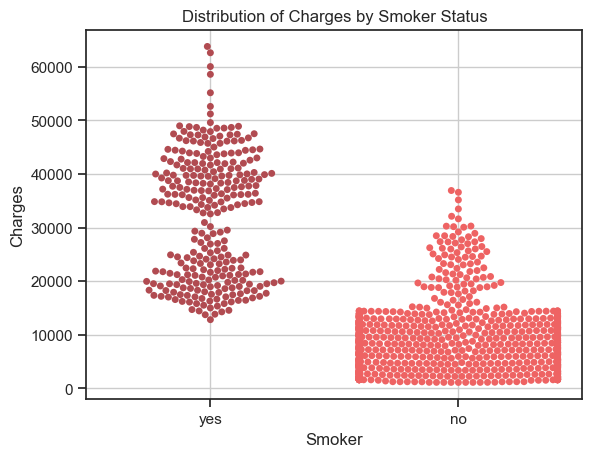

In [36]:
sns.swarmplot(x='smoker', y='charges', data=df, palette=p)
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Distribution of Charges by Smoker Status')
plt.grid()
plt.show()

*Points on the above swarm graph shows unique distribution of insurance charges among smokers and non-smokers.*

In [10]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode

init_notebook_mode(connected=True)
init_notebook_mode(connected=True)
px.defaults.template = "plotly_white"
plot_df=df.copy()
fig = px.box(plot_df, x="region", y="charges", color="region", 
             notched=True, points="outliers", height=600,
             title="Distribution of Insurance Costs by Region",
             color_discrete_sequence=['#B14B51', '#D0A99C', '#5D8370', '#6C839B'])
fig.update_traces(marker=dict(size=9, opacity=0.5, line=dict(width=1,color="#F7F7F7")), showlegend=False)
fig.update_layout(font_color="#303030", xaxis_title='Region', yaxis_title='Claim Amount, $',
                  yaxis=dict(showgrid=True, gridwidth=1, gridcolor='#EAEAEA', zerolinecolor='#EAEAEA'))
fig.show()

![Plot Image](box.png)

*The graph shows distribution of insurance charges(cost) across different regions of the country*

In [11]:
fig=px.histogram(df, x='charges', color='smoker', opacity=0.7, barmode='overlay',
                 histnorm='probability density', marginal='box', 
                 title="Distribution of Insurance Costs by Smoking Status",
                 color_discrete_sequence=['#B14B51','#B7A294']) 
fig.update_layout(font_color="#303030", xaxis_title='Claim Amount, $',
                  yaxis=dict(title='Probability Density', gridcolor='#EAEAEA', zerolinecolor='#EAEAEA'),
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1, title=""))
fig.update_xaxes(showgrid=False, zerolinecolor='#EAEAEA')
fig.show()

![Plot Image](sc.png)

*Graph shows distribution of insurance costs based on smoking status. Shows two overlaid histograms, one for smokers and one for non-smokers. Additionally, the graph displays a boxplot at the top which provides summary statistic for the two groups.*

In [14]:
fig = px.scatter(df, x='bmi', y='charges', color='smoker', size='charges',
                 title="Insurance costs increase with Body Mass Index among Smokers",
                 color_discrete_sequence=['#B14B51','#B7A294'],height=600)
fig.update_layout(legend=dict(title='',orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
                  font_color="#303030", xaxis=dict(title='Body Mass Index (BMI)',showgrid=False), 
                  yaxis=dict(title='Claim Amount, $',showgrid=False, zerolinecolor='#E5E5EA',
                             showline=True, linecolor='#E5E5EA', linewidth=2))
fig.show()

![Plot Image](newplot.png)

*Graph displays relationship between BMI and insurance charges between smokers and non-smokers*